In [44]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [45]:
%store -r df_QCX
%store -r df_pilas

In [46]:
df_QCX = df_QCX
df_pilas = df_pilas

# 0. Cambio tipo de datos

In [47]:
df_pilas = df_pilas.astype({
    'Index': 'int64',
    ' Time': 'datetime64[ns]',
    ' Mound': 'object',
    ' Comment': 'object',
    'idPila': 'int64'
})

# Reemplazar valores no numéricos (como espacios en blanco) con NaN
cols_to_convert = [
    ' "LSF"  [CurrentAnalysis.Dry basis]', ' "LSF"  [Rolling.Analysis1.Dry basis]', ' "SM"  [Rolling.Analysis1.Dry basis]',
    ' "IM"  [Rolling.Analysis1.Dry basis]', ' "Tph"  [Rolling.Analysis1.Dry basis]', ' "IM"  [CurrentProduct.Dry basis]',
    ' "LSF"  [CurrentProduct.Dry basis]', ' "SM"  [CurrentProduct.Dry basis]', ' "Tph"  [CurrentProduct.Dry basis]',
    ' "CaO"  [CurrentProduct.Dry basis]', ' "CaO"  [Rolling.Analysis1.Dry basis]', ' "MgO"  [CurrentProduct.Dry basis]',
    ' "MgO"  [Rolling.Analysis1.Dry basis]', ' "Al2O3"  [CurrentProduct.Dry basis]', ' "Fe2O3"  [CurrentProduct.Dry basis]',
    ' "Al2O3"  [Rolling.Analysis1.Dry basis]', ' "Fe2O3"  [Rolling.Analysis1.Dry basis]', ' "SiO2"  [CurrentProduct.Dry basis]',
    ' "SiO2"  [Rolling.Analysis1.Dry basis]', ' "SM"  [CurrentAnalysis.Dry basis]', ' "CaO"  [CurrentAnalysis.Dry basis]',
    ' "MgO"  [CurrentAnalysis.Dry basis]', ' "IM"  [CurrentAnalysis.Dry basis]', ' "Fe2O3"  [CurrentAnalysis.Dry basis]',
    ' "Al2O3"  [CurrentAnalysis.Dry basis]', ' "SiO2"  [CurrentAnalysis.Dry basis]', ' "Tph"  [CurrentAnalysis.Dry basis]',
    ' "Tons"  [CurrentProduct.Dry basis]'
]

# Reemplazar valores no numéricos o espacios en blanco con NaN en las columnas especificadas
df_pilas[cols_to_convert] = df_pilas[cols_to_convert].replace(r'^\s*$', np.nan, regex=True)

# Intentar nuevamente convertir las columnas a float64
df_pilas[cols_to_convert] = df_pilas[cols_to_convert].astype('float64')

# Verificar los tipos de datos
print(df_pilas.dtypes)

Index                                               int64
 Time                                      datetime64[ns]
 Period                                           float64
 Seconds since                                    float64
 Mound                                             object
 Comment                                           object
 "LSF"  [CurrentAnalysis.Dry basis]               float64
 "LSF"  [Rolling.Analysis1.Dry basis]             float64
 "SM"  [Rolling.Analysis1.Dry basis]              float64
 "IM"  [Rolling.Analysis1.Dry basis]              float64
 "Tph"  [Rolling.Analysis1.Dry basis]             float64
 "IM"  [CurrentProduct.Dry basis]                 float64
 "LSF"  [CurrentProduct.Dry basis]                float64
 "SM"  [CurrentProduct.Dry basis]                 float64
 "Tph"  [CurrentProduct.Dry basis]                float64
 "CaO"  [CurrentProduct.Dry basis]                float64
 "CaO"  [Rolling.Analysis1.Dry basis]             float64
 "MgO"  [Curre

In [48]:
# Lista de columnas a procesar
cols_to_convert2 = [
    'FCAO', 'SiO2', 'Al2O3',
    'Fe2O3', 'CaO', 'MgO', 'SO3', 'K2O', 'Na2O', 'C3S', 'C2S', 'C3A',
    'C4AF', 'A/S', 'idPila'
]

# Reemplazar cualquier valor que no sea numérico por NaN en las columnas especificadas
df_QCX[cols_to_convert2] = df_QCX[cols_to_convert2].applymap(lambda x: np.nan if not str(x).replace('.', '', 1).isdigit() else x)

# Verificar los tipos de datos después del reemplazo
df_QCX.dtypes

C:\Users\julit\AppData\Local\Temp\ipykernel_31816\3921530317.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_QCX[cols_to_convert2] = df_QCX[cols_to_convert2].applymap(lambda x: np.nan if not str(x).replace('.', '', 1).isdigit() else x)


fecha         datetime64[ns]
fecha-hora    datetime64[ns]
id_eq                 object
Muestra #              int64
FCAO                 float64
SiO2                 float64
Al2O3                float64
Fe2O3                float64
CaO                  float64
MgO                  float64
SO3                  float64
K2O                  float64
Na2O                 float64
C3S                  float64
C2S                  float64
C3A                  float64
C4AF                 float64
A/S                  float64
idPila               float64
dtype: object

# 1. Análisis Exploratorio de Datos (EDA) df_pilas

In [ ]:
# Mostrar información básica
print(f"El DataFrame tiene {df_pilas.shape[0]} filas y {df_pilas.shape[1]} columnas.")
print("\nNombres de las columnas:")
df_pilas.columns

In [ ]:
# Mostrar las primeras filas del DataFrame df_pilas
print("\nPrimeras filas del DataFrame:")
df_pilas.head()

In [ ]:
# 1. Tipos de datos de las columnas
print("\nTipos de datos de las columnas:")
print(df_pilas.dtypes)

In [ ]:
# 2. Valores nulos por columna
print("\nValores nulos por columna:")
df_pilas.isnull().mean()

In [ ]:
# 3. Estadísticas descriptivas de las variables numéricas
print("\nResumen estadístico:")
df_pilas.describe()

In [ ]:
# 4. Visualización de distribuciones de variables numéricas
num_columns = df_pilas.select_dtypes(include=[np.number]).columns
for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_pilas[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.show()



In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_pilas.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de la correlación entre variables numéricas')
plt.show()

# 2. Análisis Exploratorio de Datos (EDA) df_QCX

In [39]:
# Mostrar información básica
print(f"El DataFrame tiene {df_QCX.shape[0]} filas y {df_QCX.shape[1]} columnas.")
print("\nNombres de las columnas:")
df_QCX.columns

El DataFrame tiene 232998 filas y 19 columnas.

Nombres de las columnas:


Index(['fecha', 'fecha-hora', 'id_eq', 'Muestra #', 'FCAO', 'SiO2', 'Al2O3',
       'Fe2O3', 'CaO', 'MgO', 'SO3', 'K2O', 'Na2O', 'C3S', 'C2S', 'C3A',
       'C4AF', 'A/S', 'idPila'],
      dtype='object')

In [40]:
# Mostrar las primeras filas del DataFrame df_QCX
print("\nPrimeras filas del DataFrame:")
df_QCX.head()


Primeras filas del DataFrame:


,fecha,fecha-hora,id_eq,Muestra #,FCAO,SiO2,Al2O3,Fe2O3,CaO,MgO,SO3,K2O,Na2O,C3S,C2S,C3A,C4AF,A/S,idPila
0,2019-01-01,2019-01-01 00:00:38,Aus_RM323,1478524,NaN,14.16677,3.409784,1.757292,42.01734,2.359858,0.104489,0.449430,0.199408,NaN,15.046283,6.062590,5.347440,6.123060,NaN
1,2019-01-01,2019-01-01 00:40:18,Man_CLK461,1478528,1.424847,21.01248,5.194796,2.515397,66.15322,3.540236,1.639114,0.640906,0.377616,65.318701,6.590723,9.510158,7.654353,0.630035,NaN
2,2019-01-01,2019-01-01 00:40:35,Aus_CLK463,1478529,1.463604,20.91105,5.145436,2.433739,66.25763,3.455422,1.649539,0.651268,0.351385,66.805214,5.059468,9.517519,7.405868,0.610880,NaN
3,2019-01-01,2019-01-01 00:44:52,Man_CLK462,1478530,1.707553,21.31690,5.215492,2.798341,67.94087,3.638040,0.128239,0.242341,0.254850,68.588091,4.128831,9.086261,8.515352,4.172559,NaN
4,2019-01-01,2019-01-01 01:00:38,Aus_RM323,1478531,NaN,13.55528,3.289323,1.687194,42.26035,2.369276,0.110288,0.432180,0.197379,NaN,8.354752,5.861974,5.134131,5.644265,NaN


In [49]:
# 1. Tipos de datos de las columnas
print("\nTipos de datos de las columnas:")
df_QCX.dtypes


Tipos de datos de las columnas:


fecha         datetime64[ns]
fecha-hora    datetime64[ns]
id_eq                 object
Muestra #              int64
FCAO                 float64
SiO2                 float64
Al2O3                float64
Fe2O3                float64
CaO                  float64
MgO                  float64
SO3                  float64
K2O                  float64
Na2O                 float64
C3S                  float64
C2S                  float64
C3A                  float64
C4AF                 float64
A/S                  float64
idPila               float64
dtype: object

In [50]:
# 2. Valores nulos por columna
print("\nValores nulos por columna:")
df_QCX.isnull().mean()


Valores nulos por columna:


fecha         0.000000
fecha-hora    0.000000
id_eq         0.000000
Muestra #     0.000000
FCAO          0.690092
SiO2          0.091207
Al2O3         0.091211
Fe2O3         0.091207
CaO           0.091207
MgO           0.091215
SO3           0.027069
K2O           0.091207
Na2O          0.091348
C3S           0.704959
C2S           0.209955
C3A           0.091211
C4AF          0.091207
A/S           0.102997
idPila        0.377703
dtype: float64

In [51]:
# 3. Estadísticas descriptivas de las variables numéricas
print("\nResumen estadístico:")
df_QCX.describe()


Resumen estadístico:


,fecha,fecha-hora,Muestra #,FCAO,SiO2,Al2O3,Fe2O3,CaO,MgO,SO3,K2O,Na2O,C3S,C2S,C3A,C4AF,A/S,idPila
count,232998,232998,2.329980e+05,72208.000000,211747.000000,211746.000000,211747.000000,211747.000000,211745.000000,226691.000000,211747.000000,211714.000000,68744.000000,184079.000000,211746.000000,211747.000000,209000.000000,144994.000000
mean,2021-12-25 22:03:20.798289664,2021-12-26 09:54:33.716825856,1.797889e+06,1.716444,15.805788,3.836330,1.857931,50.283727,2.476949,0.697897,0.552797,0.311281,66.843469,6.642814,7.022666,5.653685,21.624836,5135.131585
min,2019-01-01 00:00:00,2019-01-01 00:00:38,1.478524e+06,0.000000,4.411268,1.277544,0.490000,1.570000,0.010000,0.000000,0.030000,0.000000,2.293053,0.000106,0.872399,1.491070,0.004574,122.000000
25%,2020-06-14 00:00:00,2020-06-14 06:08:53.249999872,1.642974e+06,1.424853,13.311860,3.212346,1.553183,42.597420,2.021492,0.054274,0.465343,0.239744,65.553338,3.538344,5.863676,4.726336,0.792080,2723.000000
50%,2022-01-26 00:00:00,2022-01-26 06:03:39,1.810074e+06,1.670000,13.694530,3.358119,1.620000,43.027230,2.350616,0.134143,0.505331,0.277630,67.030166,5.355644,6.187230,4.929660,6.287448,5123.000000
75%,2023-06-29 00:00:00,2023-06-29 03:02:08,1.955443e+06,1.910000,20.566230,4.940000,2.386736,65.609700,2.904228,1.496414,0.633751,0.379725,68.433988,7.702396,8.964136,7.262838,14.335987,7523.000000
max,2024-11-12 00:00:00,2024-11-12 10:07:49,2.083209e+06,12.765030,31.450000,7.690000,4.500000,70.690000,266.000000,259.000000,349.000000,49.000000,83.586189,289.641564,16.231480,13.693500,809653.934485,10322.000000
std,NaN,NaN,1.760990e+05,0.508262,3.460665,0.853970,0.419883,10.897631,1.086148,1.077689,1.008817,0.346001,2.932570,5.582576,1.572966,1.277703,1785.883774,2807.486489


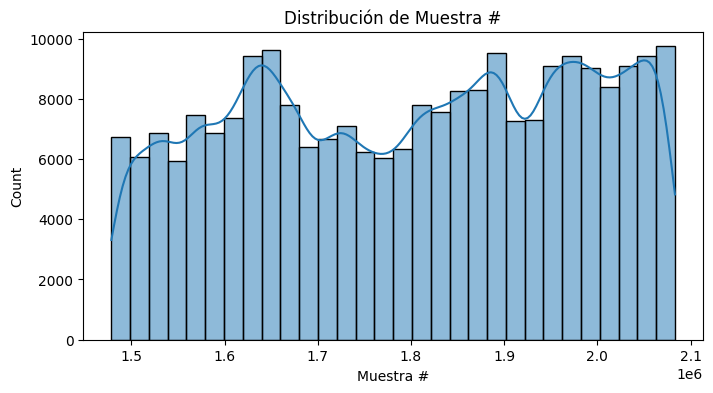

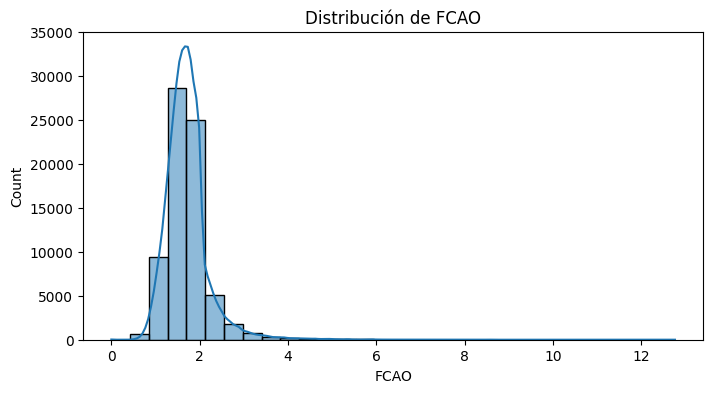

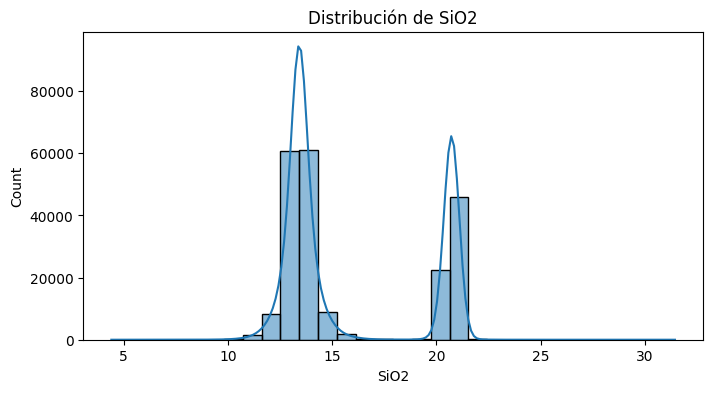

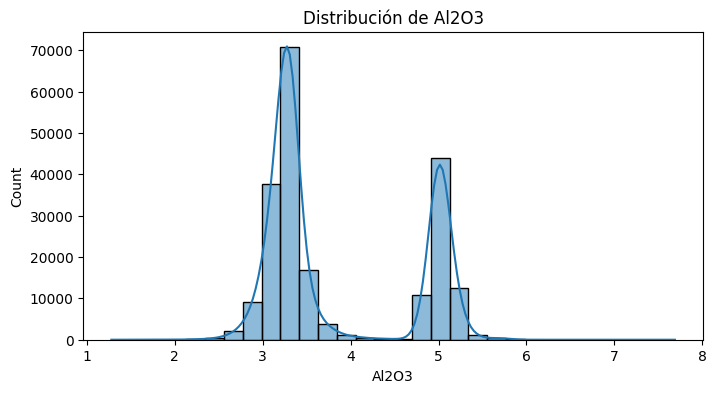

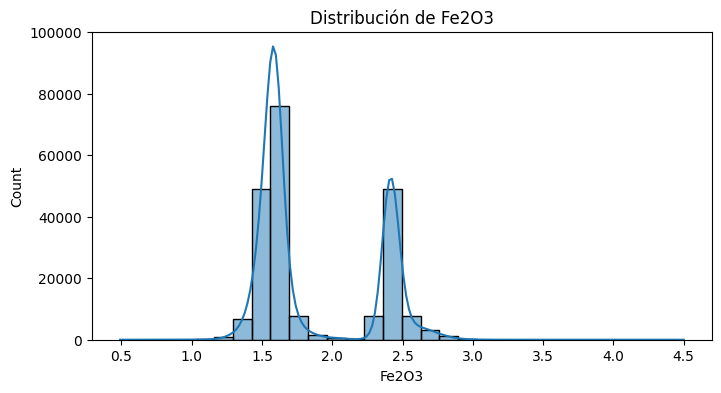

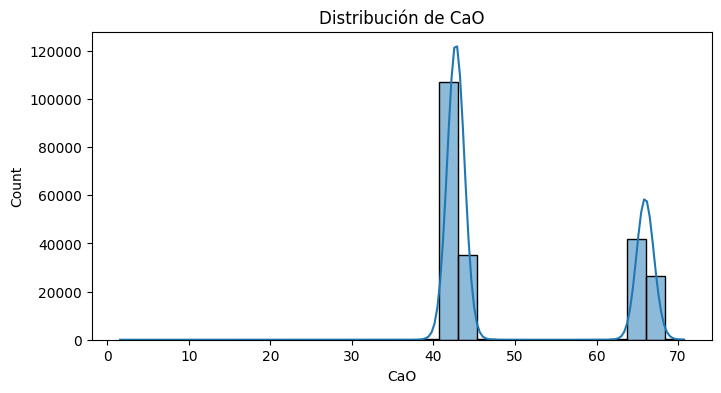

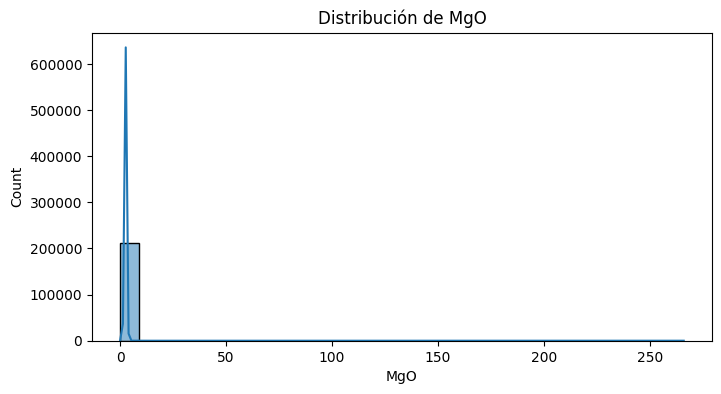

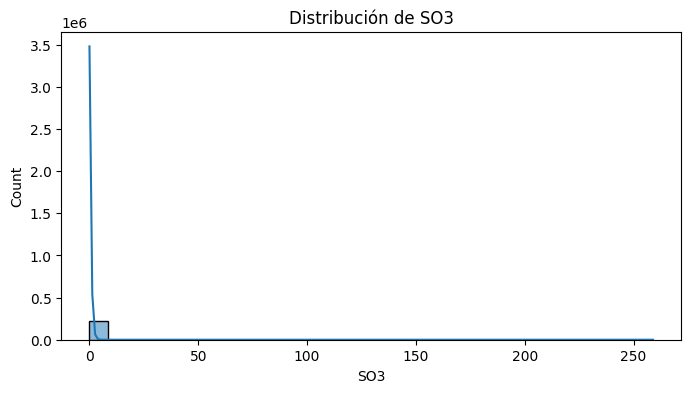

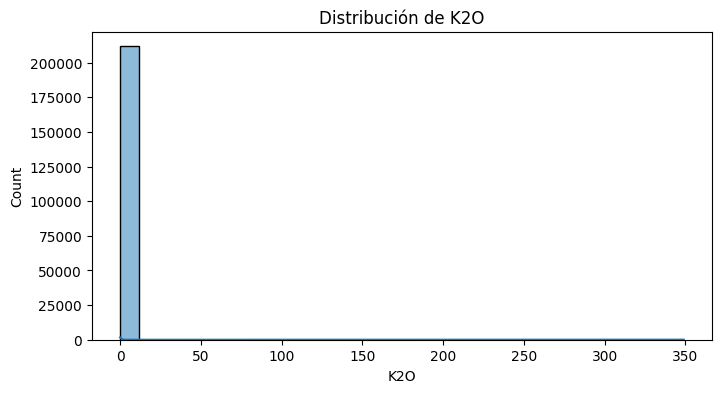

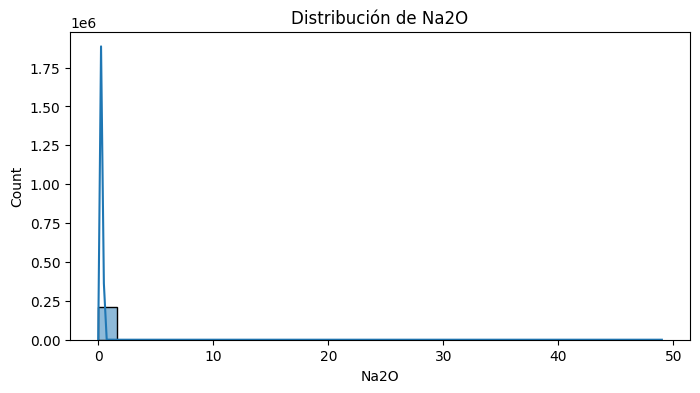

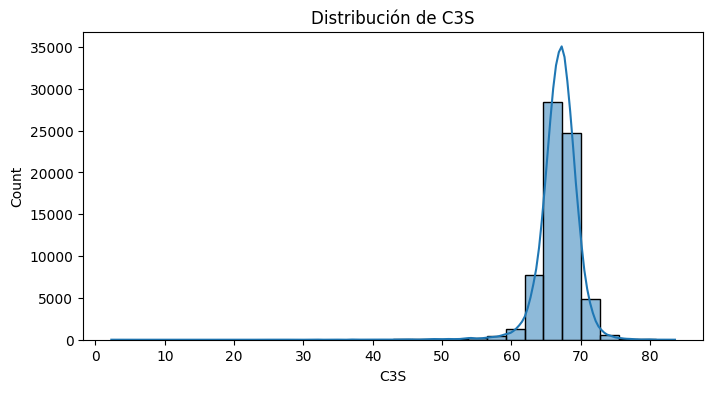

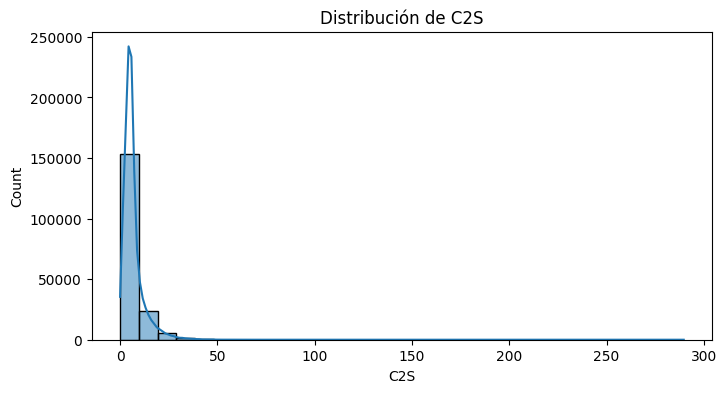

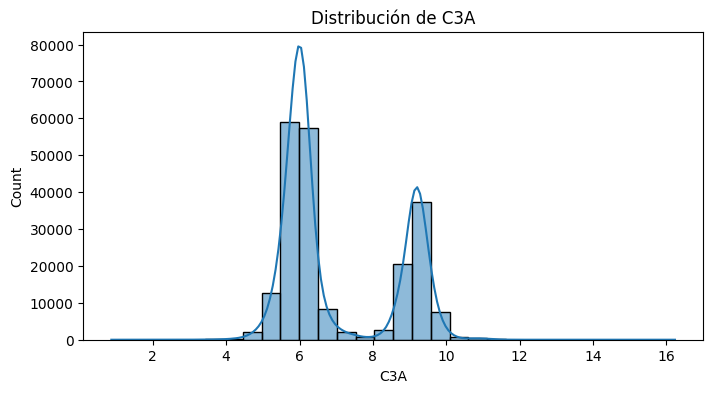

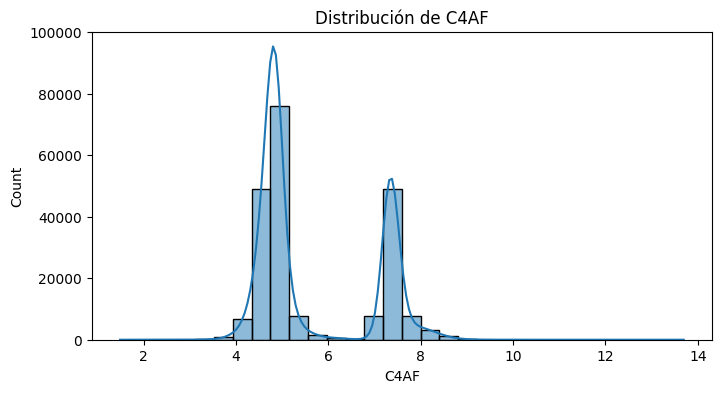

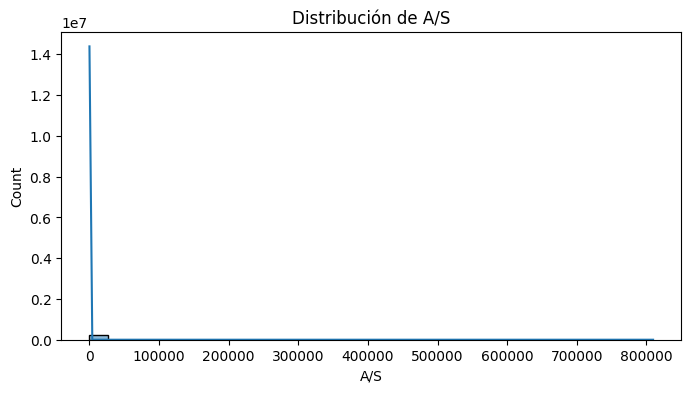

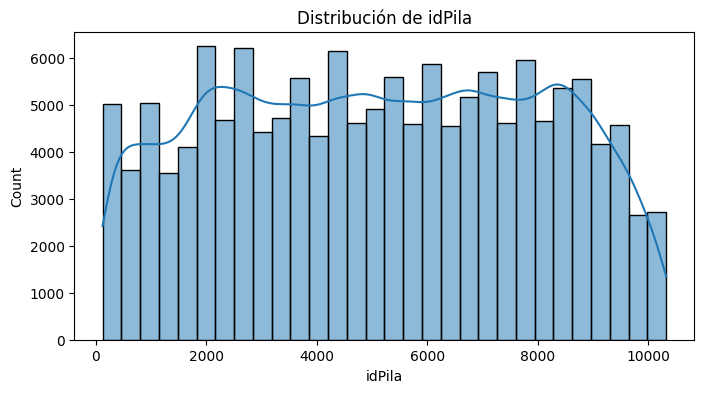

In [52]:
# 4. Visualización de distribuciones de variables numéricas
num_columns = df_QCX.select_dtypes(include=[np.number]).columns
for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_QCX[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.show()

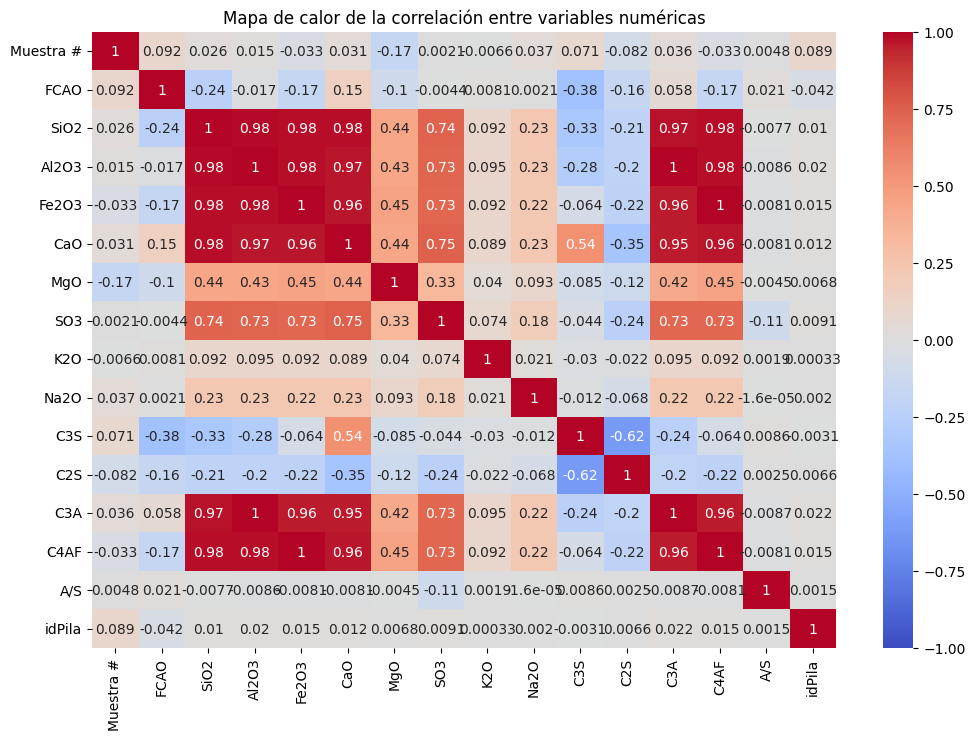

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_QCX.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de la correlación entre variables numéricas')
plt.show()

In [55]:
%store df_QCX
%store df_pilas

Stored 'df_QCX' (DataFrame)
Stored 'df_pilas' (DataFrame)
